# Llamadas al 911 concurso de Kaggle

Para este proyecto se realizará el análsis de los datos de las llamadas al 911 que ocurrieron en Estados Unidos; esta información es para uno de los concursos que realiza Kaggle respecto a Data Science y Machine Learning [Kaggle](https://www.kaggle.com/mchirico/montcoalert). Los datos contienen la siguiente información.

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

** Se pide realizar un análisis exploratorio a los datos para descubir a que departamento llamaron mas y en que período (énfasis particular en la visualización) **


# Datos e importación 


** Importar numpy y pandas y ejecutar gráficos dentro del notebook %matplotlib inline **

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

** Leemos los datos del Dataframe y los guardamos en una variable llamada df, se revisa la información y los promeros datos del mismo **

In [3]:
df = pd.read_csv('911.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [5]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1


## Preguntas de exploración

** A continuación se realizarán preguntas para poder llevar a cabo el análisis exploratorio de los datos con el objetivo de encontrar información útil (tal y como se haría en un escenario práctico); cabe mencionar que estas preguntas, relaciones y conclusiones no son, ni por mucho, las únicas.**

** ¿Cuáles fueron los 5 códigos postales que más llamaron al 911 (en qué códigos postales hay mas accidentes)? **

In [6]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

** ¿Cuáles fueron los poblados donde se reportaron mas accidentes (mas llamadas al 911)? **

In [7]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [8]:
df['title'].nunique()

110

## Analizando las características

** En la columna de títulos se encuentra el apartado "Reasons/Departments" (Departamento), especificado antes del código. Estos son EMS, Fire, and Traffic (para emergencias, fuego y tráfico, respectivamente). **

** Para facilitar el análisis se solicita separar el departamento y colocarlo en una nueva columna **

In [9]:
df['Depto'] = df['title'].apply(lambda title: title.split(':')[0])

** ¿Cuál fue el departamento mas llamado? **

In [10]:
df['Depto'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Depto, dtype: int64

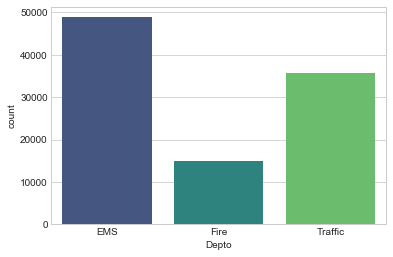

In [11]:
sns.countplot(x='Depto',data=df,palette='viridis')

** Ahora enfocándose en el ámbito temporal, se analizarán las distintas condiciones de las llamadas (y a que departamneto fueron hechas) en el ámbito temporal, para esto se separán los distintos departamentos en columnas, se cambiará el formato temporal en las columnas correspondientes y finalmente se visualizará la data. **

In [12]:
type(df['timeStamp'].iloc[0])

str

In [13]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [14]:
df['Hora'] = df['timeStamp'].apply(lambda time: time.hour)
df['Mes'] = df['timeStamp'].apply(lambda time: time.month)
df['Día de la semana'] = df['timeStamp'].apply(lambda time: time.dayofweek)

In [15]:
dmap = {0:'Lun',1:'Mar',2:'Mie',3:'Jue',4:'Vie',5:'Sab',6:'Dom'}

In [16]:
df['Día de la semana'] = df['Día de la semana'].map(dmap)

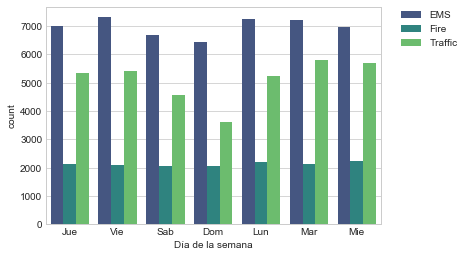

In [17]:
sns.countplot(x='Día de la semana',data=df,hue='Depto',palette='viridis')

# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

** Ahora para el mes:**

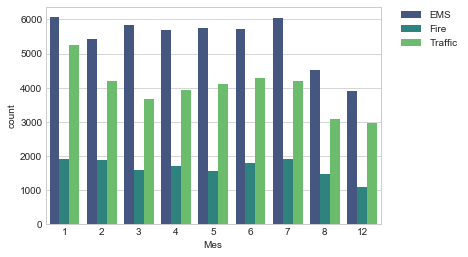

In [18]:
sns.countplot(x='Mes',data=df,hue='Depto',palette='viridis')

# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Limpiando y completando los datos

** Puede verse que los datos están incompletos (faltan algunos meses), por lo cual se buscará llenar la información faltante de alguna otra manera (se usará una gráfica lineal).**

In [22]:
byMonth = df.groupby('Mes').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Depto,Hora,Día de la semana
Mes,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


** Ahora hacemos una gráfica simple indicando las llamadas indicadas por mes. **

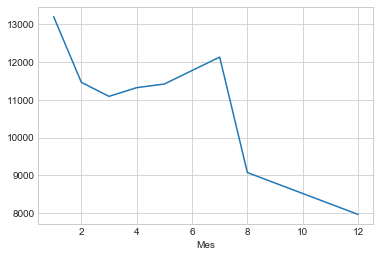

In [23]:
# Could be any column
byMonth['twp'].plot()

** Ahora usaremos la función de deaborn lmplot() para crear un "fit" lineal de los datos por mes. Cabe mencionar que hay que resetear el índice. **

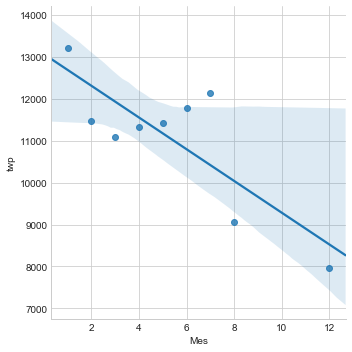

In [24]:
sns.lmplot(x='Mes',y='twp',data=byMonth.reset_index())

**Hacemos una nueva columna llamada 'Fecha' que contenga todos los datos de la columna timeStamp.**

In [25]:
df['Fecha']=df['timeStamp'].apply(lambda t: t.date())

** Ahora aplicamos groupby a la columna Fecha count() y graficamos todas las llamadas al  91s.**

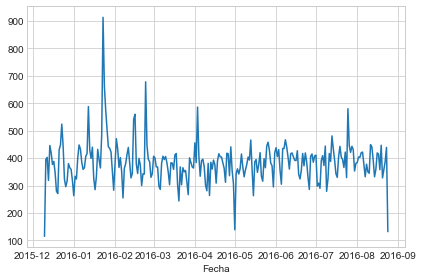

In [26]:
df.groupby('Fecha').count()['twp'].plot()
plt.tight_layout()

** Ahora creamos 3 gráficas separadas, siendo cada una una razón distinta para la llamada al 911**

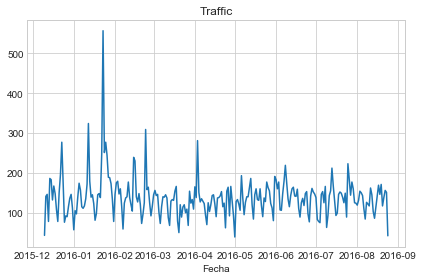

In [27]:
df[df['Depto']=='Traffic'].groupby('Fecha').count()['twp'].plot()
plt.title('Traffic')
plt.tight_layout()

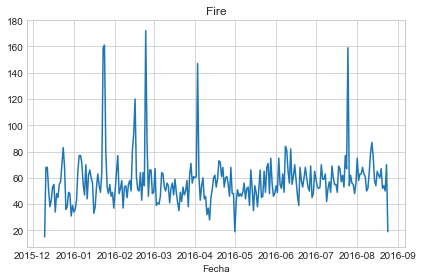

In [28]:
df[df['Depto']=='Fire'].groupby('Fecha').count()['twp'].plot()
plt.title('Fire')
plt.tight_layout()

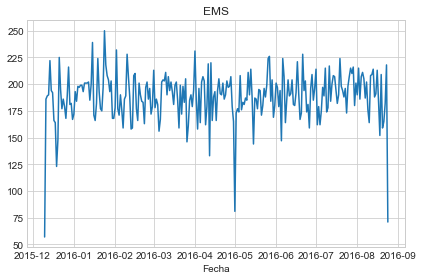

In [29]:
df[df['Depto']=='EMS'].groupby('Fecha').count()['twp'].plot()
plt.title('EMS')
plt.tight_layout()

____
** Finalmente se crearan los mapas de calor. (Se necesita reestructurar la data)**

In [30]:
diaHora = df.groupby(by=['Día de la semana','Hora']).count()['Depto'].unstack()
diaHora.head()

Hora,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Día de la semana,,,,,,,,,,,,,,,,,,,,,
Dom,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Jue,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Lun,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Mar,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Mie,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


** Ahora creamos el mata con esta data reestrucutrada. **

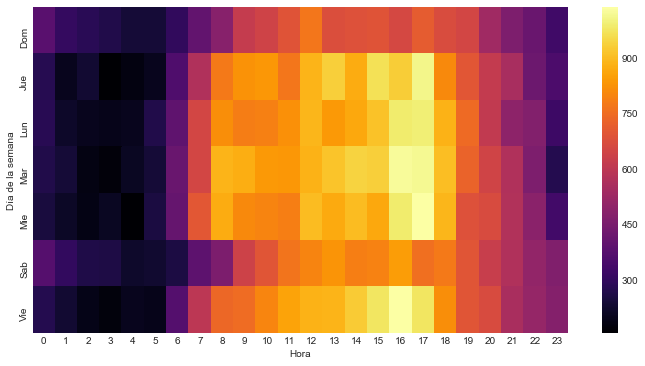

In [31]:
plt.figure(figsize=(12,6))
sns.heatmap(diaHora,cmap='inferno')

** Finalmente un CLustermap DataFrame. **

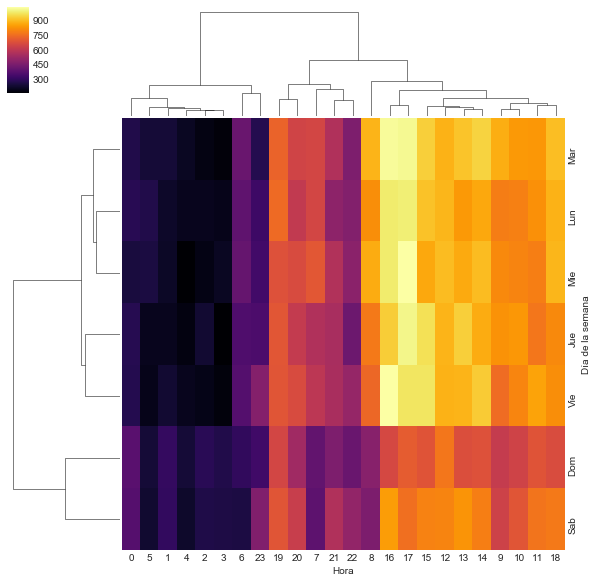

In [32]:
sns.clustermap(diaHora,cmap='inferno')

** Ahora cada gráfica para los meses. **

In [33]:
diaMes = df.groupby(by=['Día de la semana','Mes']).count()['Depto'].unstack()
diaMes.head()

Mes,1,2,3,4,5,6,7,8,12
Día de la semana,,,,,,,,,
Dom,1960,1229,1102,1488,1424,1333,1672,1021,907
Jue,1584,1596,1900,1601,1590,2065,1646,1230,1266
Lun,1727,1964,1535,1598,1779,1617,1692,1511,1257
Mar,1973,1753,1884,1430,1918,1676,1670,1612,1234
Mie,1700,1903,1889,1517,1538,2058,1717,1295,1262


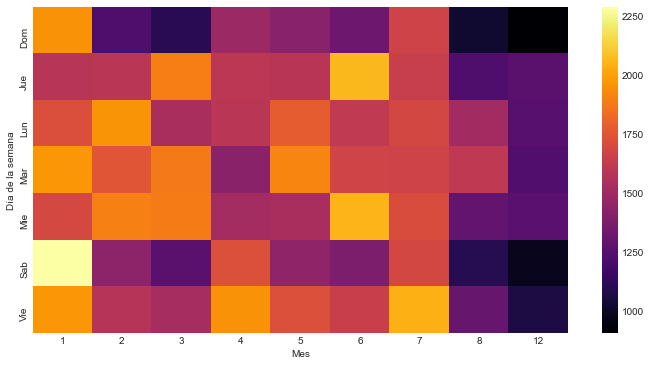

In [34]:
plt.figure(figsize=(12,6))
sns.heatmap(diaMes,cmap='inferno')

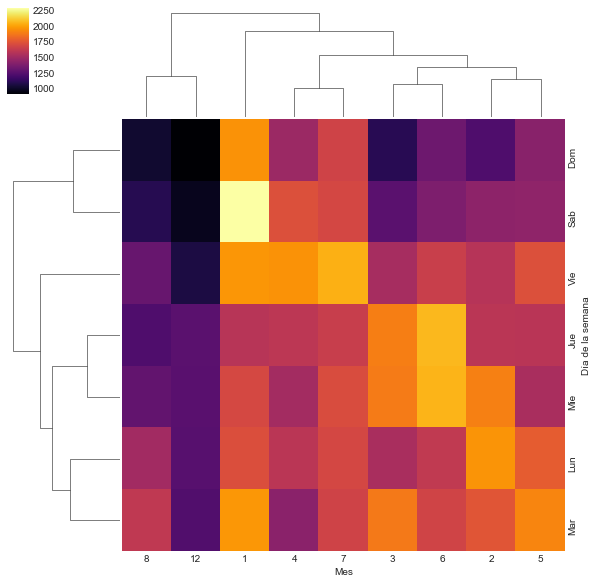

In [35]:
sns.clustermap(diaMes,cmap='inferno')